In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="whitegrid")

In [3]:
import pandas as pd
import numpy as np

# Create quarterly date range (Quarter End frequency)
quarters = pd.date_range(start="2022-01-01", periods=20, freq="QE")

# Simulate sales data (in millions €)
np.random.seed(42)
sales = np.random.normal(loc=4000, scale=500, size=len(quarters)).round(1)

# Simulate profit margins (% after cost)
profit_margin = np.random.normal(loc=0.15, scale=0.03, size=len(quarters)).round(3)

# Simulate customer demographic segments
customer_age_group = np.random.choice(["18-25", "26-35", "36-50", "51+"], size=len(quarters))
customer_income_level = np.random.choice(["Low", "Medium", "High"], size=len(quarters))

# Create DataFrame
df = pd.DataFrame({
    "Quarter": quarters,
    "Sales (€M)": sales,
    "Profit Margin (%)": profit_margin * 100,
    "Age Group": customer_age_group,
    "Income Level": customer_income_level
})

df.head()

,Quarter,Sales (€M),Profit Margin (%),Age Group,Income Level
0,2022-03-31,4248.4,19.4,36-50,Low
1,2022-06-30,3930.9,14.3,26-35,Medium
2,2022-09-30,4323.8,15.2,26-35,High
3,2022-12-31,4761.5,10.7,51+,Low
4,2023-03-31,3882.9,13.4,26-35,Medium


In [4]:
# Show summary statistics
df.describe()

,Quarter,Sales (€M),Profit Margin (%)
count,20,20.000000,20.00000
mean,2024-08-14 20:24:00,3914.350000,14.19500
min,2022-03-31 00:00:00,3043.400000,9.10000
25%,2023-06-07 06:00:00,3675.675000,11.72500
50%,2024-08-15 00:00:00,3882.900000,14.20000
75%,2025-10-23 00:00:00,4254.125000,15.60000
max,2026-12-31 00:00:00,4789.600000,20.60000
std,NaN,480.012346,2.91899


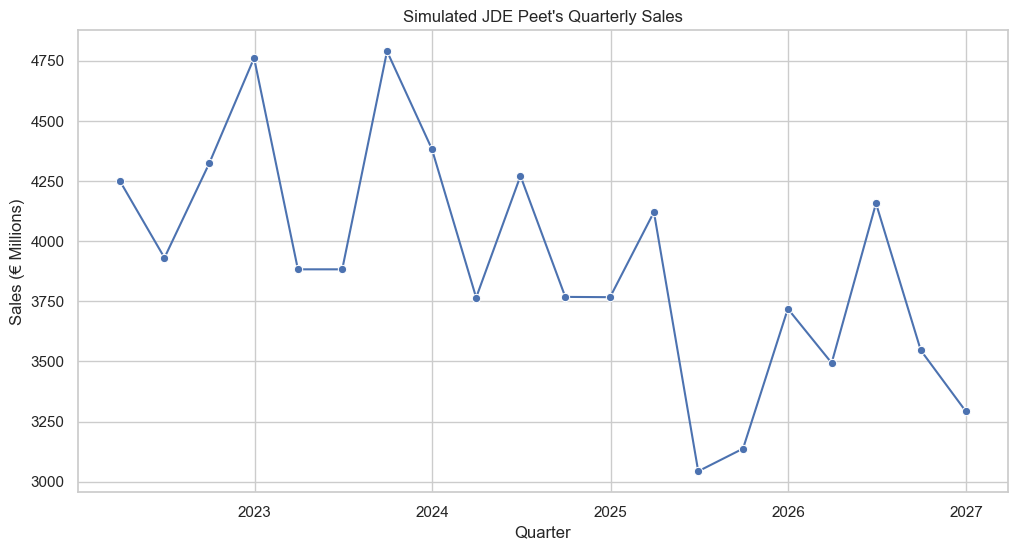

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Quarter", y="Sales (€M)", data=df, marker='o')
plt.title("Simulated JDE Peet's Quarterly Sales")
plt.ylabel("Sales (€ Millions)")
plt.show()

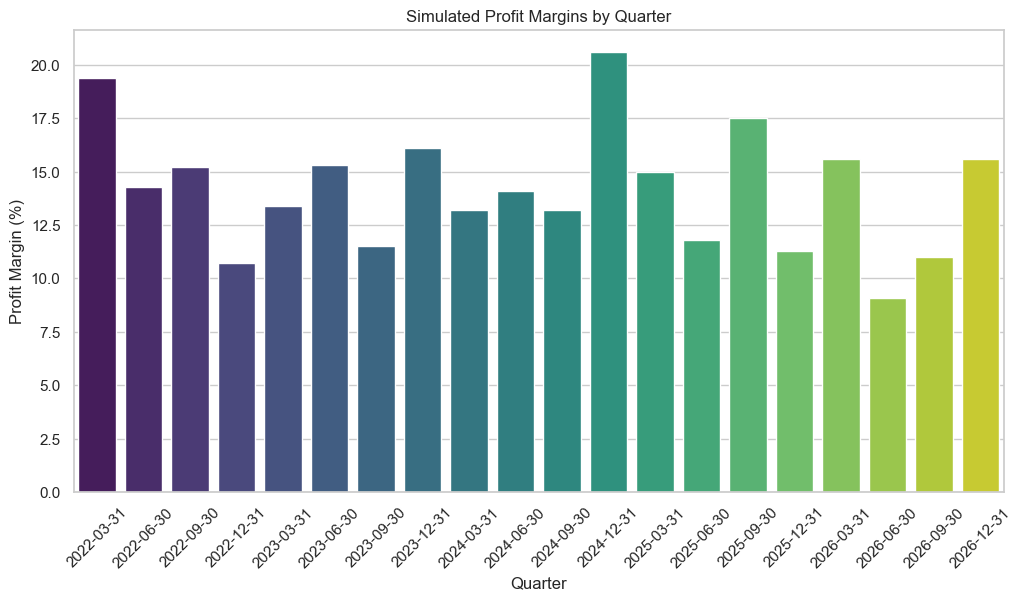

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Quarter",
    y="Profit Margin (%)",
    hue="Quarter",
    data=df,
    palette="viridis",
    legend=False
)
plt.xticks(rotation=45)
plt.title("Simulated Profit Margins by Quarter")
plt.show()

In [8]:
# Age group breakdown
age_dist = df["Age Group"].value_counts().reset_index()
age_dist.columns = ["Age Group", "Count"]
age_dist

,Age Group,Count
0,26-35,8
1,51+,6
2,36-50,4
3,18-25,2


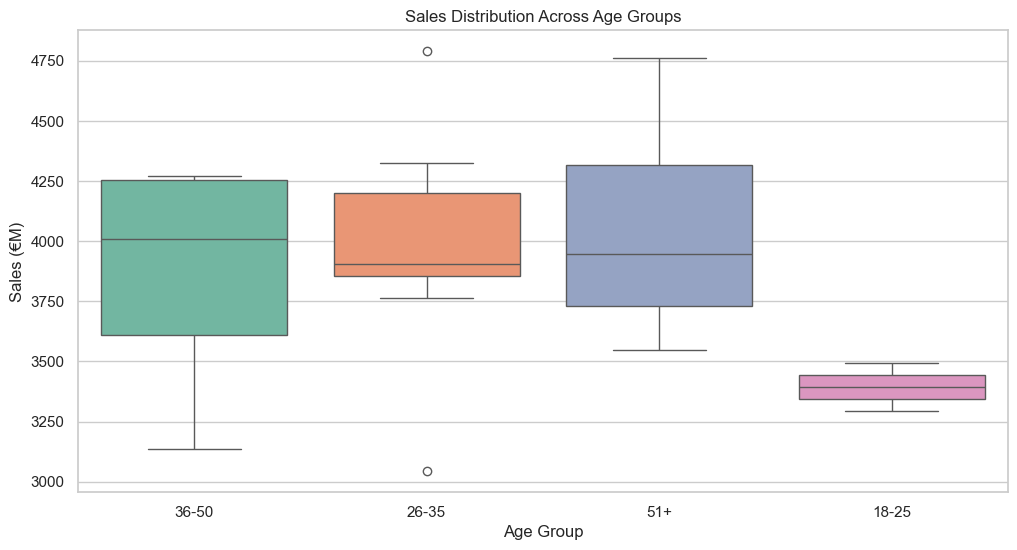

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="Age Group",
    y="Sales (€M)",
    data=df,
    hue="Age Group",      # Explicitly assign hue
    palette="Set2",
    legend=False          # Prevent duplicate legend
)
plt.title("Sales Distribution Across Age Groups")
plt.show()

In [11]:
df.to_csv("jde_peets_sales_demographics.csv", index=False)
print("Dataset exported!")

Dataset exported!
